<a href="https://colab.research.google.com/github/vinay-500/pytorch_starter/blob/main/pytorch_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
class Model(nn.Module):
  def __init__(self, in_features = 4, h1=8, h2 = 9, out_features =3 ):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [28]:
torch.manual_seed(32)

model = Model()

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"

In [31]:
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
df['species'] = df['species'].replace('setosa', 0.0)
df['species'] = df['species'].replace('versicolor', 1.0)
df['species'] = df['species'].replace('virginica', 2.0)


In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [34]:
X = df.drop('species', axis = 1)
y = df['species']

In [35]:
X = X.values
y = y.values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [38]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [39]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [40]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [41]:
epochs = 200

losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f"Epoch {i} and loss {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 1.169895887374878
Epoch 10 and loss 0.9578844308853149
Epoch 20 and loss 0.7988812923431396
Epoch 30 and loss 0.634953498840332
Epoch 40 and loss 0.44043001532554626
Epoch 50 and loss 0.291716992855072
Epoch 60 and loss 0.17829042673110962
Epoch 70 and loss 0.11587586998939514
Epoch 80 and loss 0.08928147703409195
Epoch 90 and loss 0.07743765413761139
Epoch 100 and loss 0.07124082744121552
Epoch 110 and loss 0.06744465976953506
Epoch 120 and loss 0.06482169777154922
Epoch 130 and loss 0.06285709887742996
Epoch 140 and loss 0.06129826232790947
Epoch 150 and loss 0.06000852212309837
Epoch 160 and loss 0.058905504643917084
Epoch 170 and loss 0.057936906814575195
Epoch 180 and loss 0.057068951427936554
Epoch 190 and loss 0.056279949843883514


Text(0.5, 0, 'epochs')

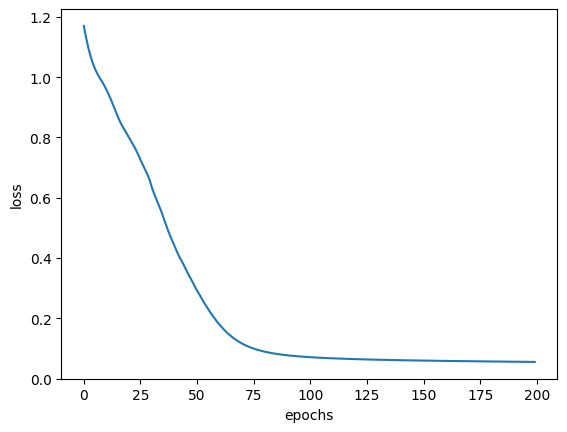

In [42]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epochs")


In [43]:
# Evaluate Model
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [44]:
loss

tensor(0.0298)

In [45]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f"{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f"We got {correct} correct")

1. tensor([-4.5474,  5.6474,  0.6258]) 	 1 	 1
2. tensor([  9.7839,   2.0130, -14.4508]) 	 0 	 0
3. tensor([  8.7851,   2.2439, -13.3628]) 	 0 	 0
4. tensor([-4.7777,  5.9443,  0.5937]) 	 1 	 1
5. tensor([-9.7693,  3.8727,  7.0655]) 	 2 	 2
6. tensor([-10.4429,   5.0144,   6.8463]) 	 2 	 2
7. tensor([  8.1658,   2.5038, -12.7315]) 	 0 	 0
8. tensor([  9.2193,   2.0836, -13.7833]) 	 0 	 0
9. tensor([-4.0243,  5.9801, -0.2057]) 	 1 	 1
10. tensor([  9.5090,   2.0918, -14.1647]) 	 0 	 0
11. tensor([-4.9568,  6.4096,  0.5537]) 	 1 	 1
12. tensor([-11.6292,   2.6205,   9.6212]) 	 2 	 2
13. tensor([-2.2209,  5.4773, -1.5542]) 	 1 	 1
14. tensor([-1.4594,  6.1748, -2.9049]) 	 1 	 1
15. tensor([-9.9357,  3.6303,  7.3054]) 	 2 	 2
16. tensor([-11.2093,   2.2251,   9.4723]) 	 2 	 2
17. tensor([-5.2317,  5.1326,  1.6100]) 	 1 	 1
18. tensor([-8.7368,  4.0250,  5.8872]) 	 2 	 2
19. tensor([-2.0934,  5.9443, -2.0632]) 	 1 	 1
20. tensor([ 10.2769,   2.1301, -15.1903]) 	 0 	 0
21. tensor([  8.9939, 

In [46]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [47]:
with torch.no_grad():
  print(model(new_iris))

tensor([  9.2516,   1.8865, -13.6523])


In [51]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [52]:
with torch.no_grad():
   print(model(newer_iris))

tensor([-9.0975,  3.6127,  6.4771])


In [53]:
# Save Model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [54]:
# Load
new_model = Model()

new_model.load_state_dict(torch.load('/content/my_iris_model.pt'))

<ipython-input-54-6d5cd0497e21>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('/content/my_iris_model.pt'))


<All keys matched successfully>

In [55]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)